In [65]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [66]:
data = pd.read_csv('amplificador.dat')
data

,mV
0,7521.2
1,7556.1
2,7478.0
3,7495.1
4,7487.3
...,...
195,7490.7
196,7544.2
197,7487.1
198,7455.1


In [67]:
voltages = data['mV']

In [68]:
#Cálculo del valor medio
voltages.mean()

7501.8

In [69]:
#Cálculo de desviación estandar
voltages.std()

26.810389495951405

In [70]:
#Creación del histograma de frecuencias con dV=2.5mV y dV=10mV
frequencys1, limits1 = np.histogram(voltages, bins=int((voltages.max()-voltages.min())/2.5))
frequencys2, limits2 = np.histogram(voltages, bins=int((voltages.max()-voltages.min())/10))

zero = np.array([0])

frequencys1 = np.concatenate((zero, frequencys1, zero))
limits1 = np.concatenate((limits1[0:1], limits1))

frequencys2 = np.concatenate((zero, frequencys2, zero))
limits2 = np.concatenate((limits2[0:1], limits2))

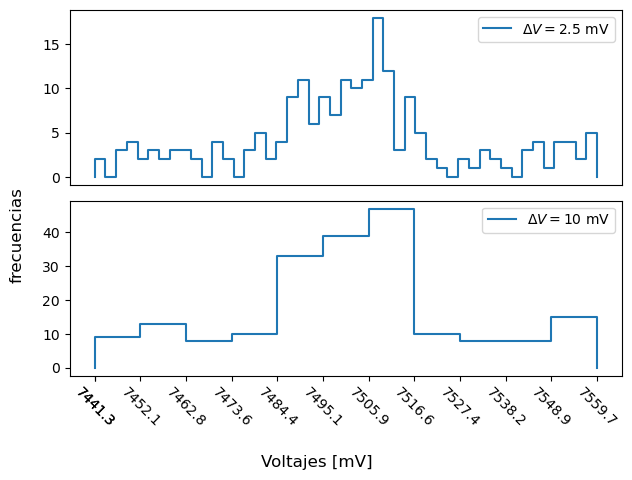

In [71]:
#Plotting
fig = plt.figure()
fig.supylabel('frecuencias')
fig.supxlabel('Voltajes [mV]')

ax1 = fig.add_subplot(2,1,1)
ax1.plot(limits1, frequencys1, drawstyle='steps-post', label=r'$\Delta V = 2.5$ mV')
ax1.set_xticks([])
ax1.legend()

ax2 = fig.add_subplot(2,1,2)
ax2.plot(limits2, frequencys2, drawstyle='steps-post', label=r'$\Delta V = 10$ mV')
ax2.set_xticks(limits2)
ax2.tick_params(axis='x', labelrotation = -45)
ax2.legend()

fig.tight_layout()
fig.savefig('voltage_hist.png')

In [72]:
#Media y desviación estandar a partir de los histogramas
Vmedio1 = (limits1[1:-1]+limits1[2:])/2
Vmedio2 = (limits2[1:-1]+limits2[2:])/2

mu1 = np.dot(frequencys1[1:-1], Vmedio1)/np.sum(frequencys1[1:-1])
mu2 = np.dot(frequencys2[1:-1], Vmedio2)/np.sum(frequencys2[1:-1])

sigma1 = np.sqrt(np.dot(frequencys1[1:-1], (Vmedio1-mu1)**2)/np.sum(frequencys1[1:-1]))
sigma2 = np.sqrt(np.dot(frequencys2[1:-1], (Vmedio2-mu2)**2)/np.sum(frequencys2[1:-1]))

print(f'mu_1 = {mu1} mv \nsig_1 = {sigma1} mv \nmu_2 = {mu2} mv \nsig_2 = {sigma2} mv')

mu_1 = 7501.772170212765 mv 
sig_1 = 26.67801024558702 mv 
mu_2 = 7501.791636363636 mv 
sig_2 = 26.770096295482723 mv


In [73]:
cuentas = np.array([147, 152, 153, 171, 146, 168, 145, 133, 168, 171])

In [74]:
sigma_c = np.round(np.sqrt(cuentas), 2)
sigma_c

array([12.12, 12.33, 12.37, 13.08, 12.08, 12.96, 12.04, 11.53, 12.96,
       13.08])

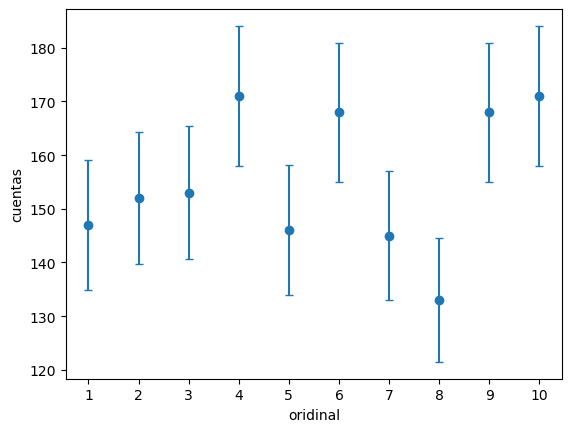

In [75]:
plt.errorbar(np.arange(1, cuentas.size+1), cuentas, yerr=sigma_c, fmt='o', capsize=3)
plt.xlabel('oridinal')
plt.ylabel('cuentas')
plt.xticks(np.arange(1, cuentas.size+1))
plt.show()

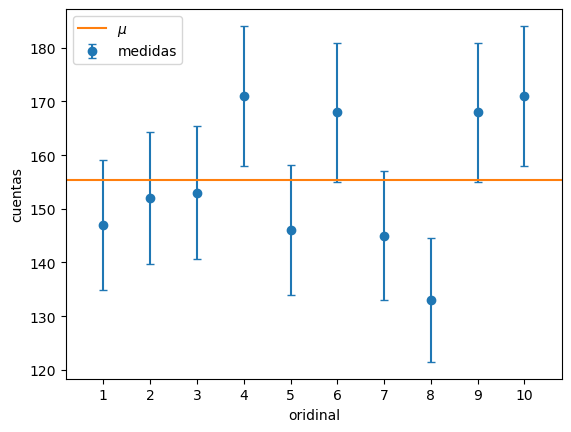

In [76]:
mu = cuentas.mean()
x_ = np.arange(1, cuentas.size+1)

plt.errorbar(x_, cuentas, yerr=sigma_c, fmt='o', capsize=3, label = 'medidas')
plt.plot(1.5*x_-2, mu*np.ones(cuentas.size), label = r'$\mu$')
plt.xlim(0.2, 10.8)
plt.xlabel('oridinal')
plt.ylabel('cuentas')
plt.xticks(x_)
plt.legend()
plt.show()

In [77]:
std = np.sqrt(np.sum((cuentas-mu)**2)/(cuentas.size-1))
mu, std

(155.4, 13.293273152655486)

In [78]:
sig_mu = np.sqrt(np.sum(cuentas)/cuentas.size**2)
sig_mu

3.9420806688854046

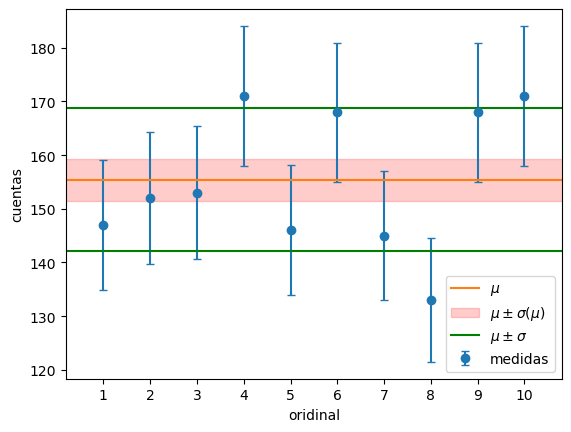

In [79]:
plt.errorbar(x_, cuentas, yerr=sigma_c, fmt='o', capsize=3, label = 'medidas')
plt.plot(1.5*x_-2, mu*np.ones(cuentas.size), label = r'$\mu$')
plt.fill_between(1.5*x_-2, (mu - sig_mu)*np.ones(cuentas.size), (mu + sig_mu)*np.ones(cuentas.size), color = 'red', alpha = 0.2, label = r'$\mu \pm \sigma(\mu)$')
plt.plot(1.5*x_-2, (mu + std)*np.ones(cuentas.size), color = 'green', label = r'$\mu \pm \sigma$')
plt.plot(1.5*x_-2, (mu - std)*np.ones(cuentas.size), color = 'green')
plt.xlim(0.2, 10.8)
plt.xlabel('oridinal')
plt.ylabel('cuentas')
plt.xticks(x_)
plt.legend()
plt.show()

In [80]:
t = np.array([6.5, 9.3, 14.6])
x = np.array([3.2, 9.7, 11.3])
sig_x = np.array([1.2, 2.1, 3.6])

#Pasa por los primeros dos puntos
a1_A = (x[1]-x[0])/(t[1]-t[0])
a0_A = x[0]-a1_A*t[0]

x_A = lambda t: a0_A + a1_A*t 

#Pasa por el primer y el último punto
a1_B = (x[2]-x[0])/(t[2]-t[0])
a0_B = x[0]-a1_B*t[0]

x_B = lambda t: a0_B + a1_B*t

#Minimiza chi²
St = np.sum(t/sig_x**2)
Stt = np.sum(t**2/sig_x**2)
Sx = np.sum(x/sig_x**2)
Stx = np.sum(t*x/sig_x**2)
S = np.sum(1/sig_x**2)

Delta = S*Stt - St**2

a1_C = (S*Stx - St*Sx)/Delta
a0_C = (Stt*Sx - St*Stx)/Delta

x_C = lambda t: a0_C + a1_C*t

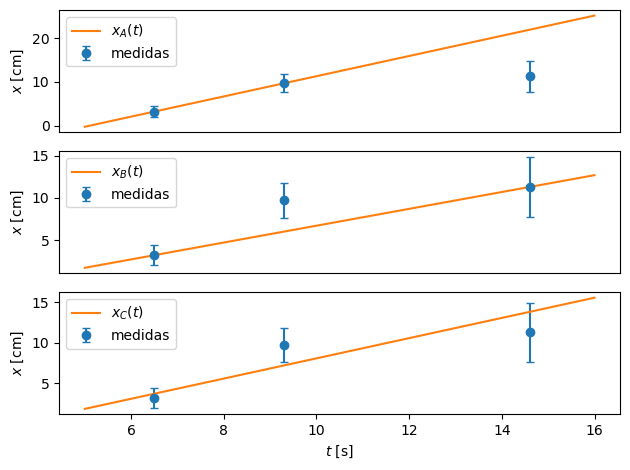

In [123]:
t_ = np.linspace(5, 16)

fig = plt.figure()

ax1 = fig.add_subplot(3,1,1)
ax1.errorbar(t, x, yerr = sig_x, fmt='o', label = 'medidas', capsize=3)
ax1.plot(t_, x_A(t_), label = r'$x_A(t)$')
ax1.set_xticks([])
ax1.set_ylabel(r'$x$ [cm]')
ax1.legend()

ax2 = fig.add_subplot(3,1,2)
ax2.errorbar(t, x, yerr = sig_x, fmt='o', label = 'medidas', capsize=3)
ax2.plot(t_, x_B(t_), label = r'$x_B(t)$')
ax2.set_xticks([])
ax2.set_ylabel(r'$x$ [cm]')
ax2.legend()

ax3 = fig.add_subplot(3,1,3)
ax3.errorbar(t, x, yerr = sig_x, fmt='o', label = 'medidas', capsize=3)
ax3.plot(t_, x_C(t_), label = r'$x_C(t)$')
ax3.set_xlabel(r'$t$ [s]')
ax3.set_ylabel(r'$x$ [cm]')
ax3.legend()

plt.tight_layout()

In [82]:
chi2_A = np.sum(((x-x_A(t))/sig_x)**2)
chi2_B = np.sum(((x-x_B(t))/sig_x)**2)
chi2_C = np.sum(((x-x_C(t))/sig_x)**2)

In [99]:
print(f""""
        a_0 \t a_1 \t chi²
A       {a0_A:.2f} \t {a1_A:.2f} \t {chi2_A:.4f}
B       {a0_B:.2f} \t {a1_B:.2f} \t {chi2_B:.4f}
C       {a0_C:.2f} \t {a1_C:.2f} \t {chi2_C:.4f} """)

"
        a_0 	 a_1 	 chi²
A       -11.89 	 2.32 	 8.8400
B       -3.30 	 1.00 	 3.1043
C       -4.37 	 1.25 	 2.0821 


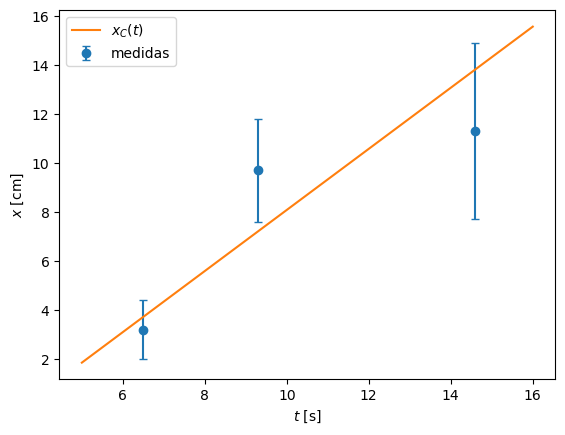

In [126]:
from scipy.optimize import curve_fit

def linear(t, a_0, a_1): return a_0 + a_1*t

a_s, covs = curve_fit(linear, t, x, sigma = sig_x)

fig2 = plt.figure()
ax1 = fig2.add_subplot(1,1,1)
ax1.errorbar(t, x, yerr = sig_x, fmt='o', label = 'medidas', capsize=3)
ax1.plot(t_, linear(t_, *a_s), label = r'$x_C(t)$')
ax1.set_xlabel(r'$t$ [s]')
ax1.set_ylabel(r'$x$ [cm]')
ax1.legend()

plt.show()

In [ ]:
chi2_s = np.sum(((x-linear(t, *a_s))/sig_x)**2)
f"{a_s}   {chi2_s:.4f}"

'2.0821'

In [116]:
sig_x_2 = np.concatenate((sig_x[:-1], np.array([30])))
a_s_2, covs = curve_fit(linear, t, x, sigma = sig_x_2)
chi2_s_2 = np.sum(((x-linear(t, *a_s))/sig_x_2)**2)

f"{a_s_2}    {chi2_s_2:.4f}"

'[-11.44993683   2.25860091]    1.5988'

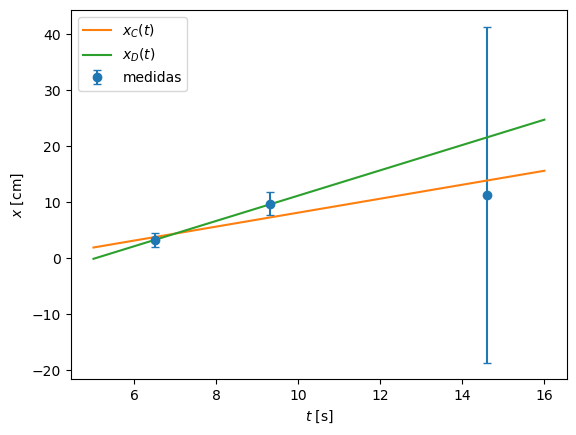

In [127]:
fig3 = plt.figure()
ax1 = fig3.add_subplot(1,1,1)
ax1.errorbar(t, x, yerr = sig_x_2, fmt='o', label = 'medidas', capsize=3)
ax1.plot(t_, linear(t_, *a_s), label = r'$x_C(t)$')
ax1.plot(t_, linear(t_, *a_s_2), label = r'$x_D(t)$')
ax1.set_xlabel(r'$t$ [s]')
ax1.set_ylabel(r'$x$ [cm]')
ax1.legend()

plt.show()

In [ ]:
#Seccion diferencial de Klein Nishina

def klein_nishina(theta, eps):
    return .5*(1 + np.cos(theta)**2 + (eps**2(1-np.cos(theta))**2)/(1+eps(1-np.cos(theta))))